In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

KeyboardInterrupt: 

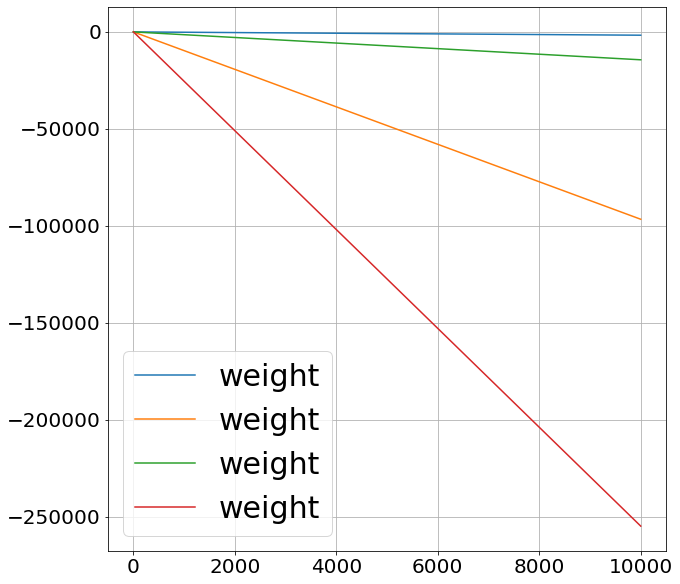

In [29]:
x = tf.random.normal(shape=(1000,), dtype=tf.float32)

# 차수, weight 개수
n = 4

# w = [weight1, weight2, weight3, weight4]
w = tf.Variable(tf.random.normal(shape=(n,), dtype=tf.float32))

# analysis 함수 
def anal(x, lamb = 1):
    return np.exp(lamb*x)

def f(anal, lamb = 1):
    return lamb*anal

# n : w 개수, w : weight
def y(x, w, n = 4):
    y = 1
    
    # y = 1 + w1*(x) + w2*(x**2) + w3*(x**3) + w4*(x**4)
    for i in range(1, n+1):
        y += w[i-1]*(x**i)
    
    return y

def yprime(x, w, n = 4):
    yprime = 0

    # yprime = w1 + 2*w2*x + 3*w3*(x**2) + 4*w4*(x**3)
    for i in range(1, n + 1):
      yprime += i*w[i-1]*(x**(i-1))

    return yprime

# lambda 값, 학습률 조정
lamb = 1
learning_rate = 0.01
EPOCH = 10

# 변화 w 값 출력
w_trace = []
w_trace.append(w.numpy())

# 학습 과정
for epoch in range(EPOCH):
    for x_unit, y_unit in zip(x, f(anal(x), lamb)):
        with tf.GradientTape() as tape:
            # 예측 값
            predict = y(x, w)
            # 오차
            # loss = tf.reduce_mean(tf.square(yprime(x, w) - f(anal(x), lamb)))
            loss = predict - f(anal(x), lamb)

            gradients = tape.gradient(loss, [w])

            w = tf.Variable(w - learning_rate*gradients[0])
            w_trace.append(w.numpy())

fig, ax = plt.subplots(figsize=(10, 10))
ax.plot(w_trace, label = 'weight')
ax.tick_params(labelsize=20)
ax.legend(fontsize=30)
ax.grid()

In [32]:
print(w)

<tf.Variable 'Variable:0' shape=(4,) dtype=float32, numpy=
array([  -1696.8368,  -96563.28  ,  -14375.031 , -254727.77  ],
      dtype=float32)>


In [33]:
gradients[0]

<tf.Tensor: shape=(4,), dtype=float32, numpy=array([  16.970318,  965.5786  ,  143.77039 , 2547.6323  ], dtype=float32)>

In [20]:
-learning_rate*gradients[0]

<tf.Tensor: shape=(4,), dtype=float32, numpy=array([-10.       ,   0.5197022, -31.200884 ,   3.965938 ], dtype=float32)>